# MEEP Priamy vlnovod

Príklad demonštruje šírenia elekromagnetickej energie v dielektrickom vlnovode. Predpokladajme, že máme dielektrický vlnovod o dĺžke 150 mm a šírke 12 mm s permitivitou $\epsilon_r = 12$. Vlnovod sa nachádza v priestore o rozmeroch 150 x 80 mm, na okrajoch prostredia sa nachádza prispôsobená vrstva (PML) o hrúbke 5mm. Na konci vlnovodu je umiestnený bodový spojitý zdroj elektromagnetického vlnenia s frekvenciou 5 GHz.


## Konfigurácia

Za základnú dĺžkovú jednotku vezmeme 1mm, normovacia časová konštanta potom bude

\begin{equation*}
t^{*} = \frac{l_0}{c} = \frac{1 \cdot 10^{-3}}{3 \cdot 10^8} = 3.33 \cdot 10^{-12} \, [s]
\end{equation*}

Normované rozmery vlnovodu budú 150 x 12 uzlov, simulačné prostredie bude mať rozmer 150 x 80 uzlov.

Perióda zdroja s frekvenciou 5 GHz je

\begin{equation*}
T = \frac{1} {f} = \frac{1}{ 5 \cdot 10^9} = 2 \cdot 10^{-10} \, [s]
\end{equation*}

normovaná perióda (v krokoch simulácie) je potom

\begin{equation*}
T^{*} = \frac{T} {t^*} = \frac{2 \cdot 10^{-10}} {3.33 \cdot 10^{-12} }  = 60
\end{equation*}

a normovaná frekvencia

\begin{equation*}
f^* = \frac{1} {T^*} = \frac{1}{60} = 0.0166
\end{equation*}



Field time usage:
        connecting chunks: 0.0055575 s
            time stepping: 0.0458762 s
            communicating: 0.0101503 s
        outputting fields: 0.000792804 s
     Fourier transforming: 5.1436e-05 s
          everything else: 0.00326957 s

-----------
Initializing structure...
Working in 2D dimensions.
Computational cell is 150 x 80 x 0 with resolution 1
     block, center = (0,0,0)
          size (1e+20,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
time for set_epsilon = 0.023681 s
-----------
run 0 finished at t = 1000.0 (2000 timesteps)


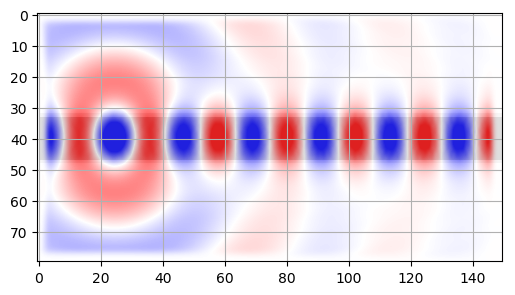

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import meep as mp

dx = 150
dy = 80
cell = mp.Vector3(dx, dy, 0)

geometry = [mp.Block(mp.Vector3(mp.inf, 15.0, 0),
                center=mp.Vector3(),
                material=mp.Medium(epsilon=4))]

sources = [mp.Source(mp.ContinuousSource(frequency=0.025), #0.0166),
            component=mp.Ez,
            center=mp.Vector3(-50, 0, 0))]

pml_layers = [mp.PML(5.0)]

resolution = 1

sim = mp.Simulation(cell_size=cell,
            boundary_layers=pml_layers,
            geometry=geometry,
            sources=sources,
            resolution=1)

sim.run(until=1000)

eps = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez).transpose()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax.imshow(eps.transpose(), cmap='binary', interpolation=None, extent=(0, dx, 0, dy), alpha=0.5)
ax.imshow(data, interpolation='spline36', cmap='bwr', alpha=0.75, norm=plt.Normalize(-0.02, 0.02))
ax.grid()
ax.set_aspect('equal')
plt.show()

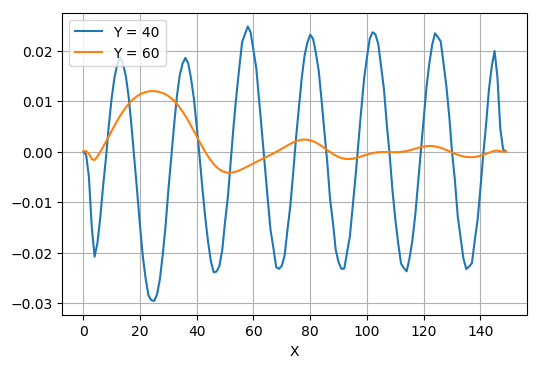

In [4]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

plt.plot(data[40,:], label='Y = 40')
plt.plot(data[60,:], label='Y = 60')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()